In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


C:\Users\Mary\AppData\Local\Temp\ipykernel_4204\4094721385.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv("../Data/Advertising.csv", index_col=0)

df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


0 TV
1 Radio
2 Newspaper


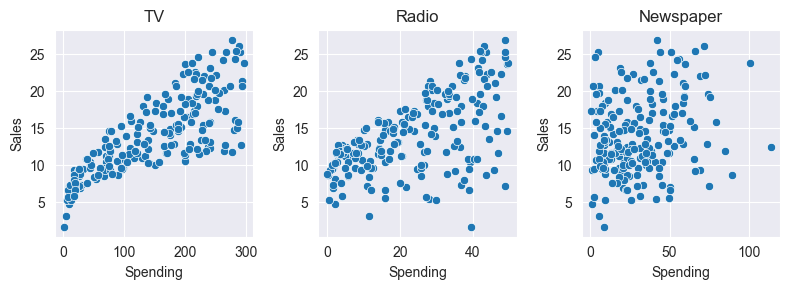

In [15]:
number_features = df.shape[1] - 1
fig, ax = plt.subplots(1, number_features, figsize = (8, 3))

for i, feature in enumerate (df.columns[:-1]):
    sns.scatterplot(data = df, x = feature, y = "Sales", ax = ax[i])
    ax[i].set(xlabel = "Spending", title = f"{feature}")

fig.tight_layout()

* number_features = df.shape[1] - 1: Определяется количество признаков (столбцов) в DataFrame, и из этого числа вычитается 1, так как последний столбец - "Sales".

In [16]:
help(enumerate)

Help on class enumerate in module builtins:

class enumerate(object)
 |  enumerate(iterable, start=0)
 |  
 |  Return an enumerate object.
 |  
 |    iterable
 |      an object supporting iteration
 |  
 |  The enumerate object yields pairs containing a count (from start, which
 |  defaults to zero) and a value yielded by the iterable argument.
 |  
 |  enumerate is useful for obtaining an indexed list:
 |      (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  __class_getitem__(...) from builtins.type
 |      See PEP 585
 |  
 |  --------------------------------------------------------

* Функция enumerate в Python используется для итерации по последовательности (например, списку, кортежу или строке) и возвращает пары значений, состоящие из индекса элемента и самого элемента. Таким образом, enumerate позволяет одновременно получать и индекс элемента (i), и сам элемент (feature) при итерации по последовательности, в данном случае, по именам столбцов DataFrame.  
* fig.tight_layout(): Обеспечивает компактное распределение графиков на фигуре.

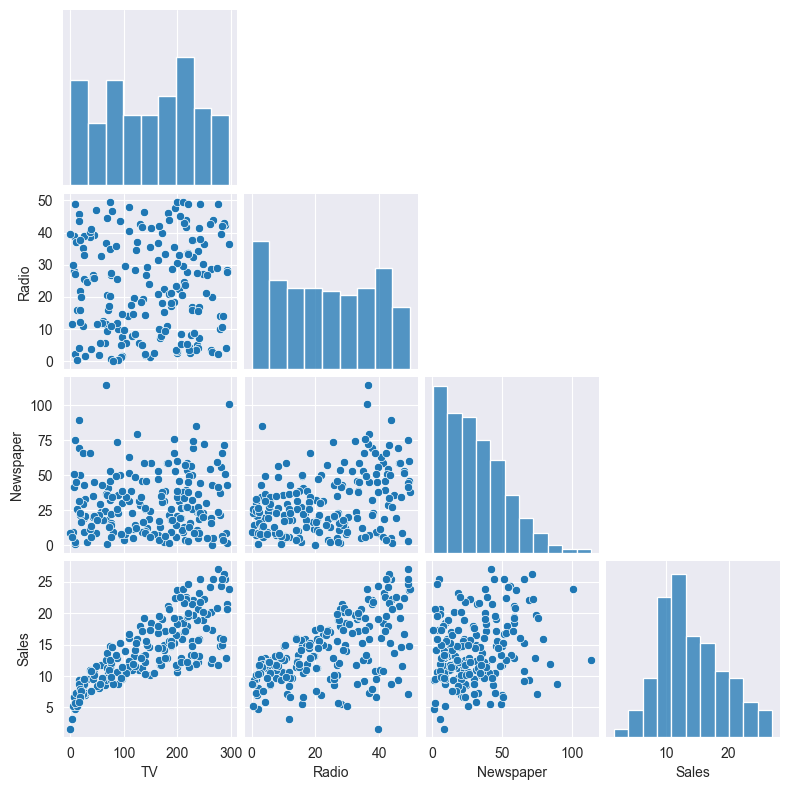

In [7]:
ax = sns.pairplot(df, corner = True, height = 2)

Intercept beta_0 hat: 7.0326
Slope beta_1 hat: 0.0475
[  0.           7.14285714  14.28571429  21.42857143  28.57142857
  35.71428571  42.85714286  50.          57.14285714  64.28571429
  71.42857143  78.57142857  85.71428571  92.85714286 100.
 107.14285714 114.28571429 121.42857143 128.57142857 135.71428571
 142.85714286 150.         157.14285714 164.28571429 171.42857143
 178.57142857 185.71428571 192.85714286 200.         207.14285714
 214.28571429 221.42857143 228.57142857 235.71428571 242.85714286
 250.         257.14285714 264.28571429 271.42857143 278.57142857
 285.71428571 292.85714286 300.         307.14285714 314.28571429
 321.42857143 328.57142857 335.71428571 342.85714286 350.        ]


[Text(0.5, 1.0, 'TV advertisement linear regression')]

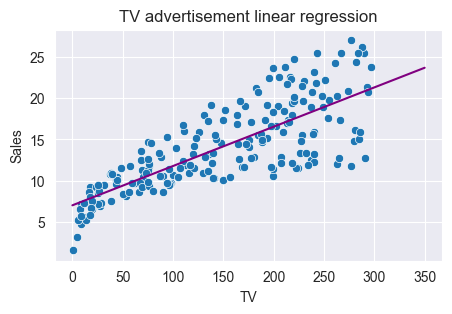

In [19]:
X, y = df["TV"], df["Sales"]
beta_1, beta_0 = np.polyfit(X, y, deg = 1)
beta_1, beta_0

y_hat = lambda x: beta_0 + beta_1*x

print (f"Intercept beta_0 hat: {beta_0:.4f}")
print(f"Slope beta_1 hat: {beta_1:.4f}")

spend = np.linspace (0, 350)

fig, ax = plt.figure(figsize = (5,3), dpi = 100), plt.axes () 
sns.scatterplot(data = df, x = "TV", y = "Sales")
sns.lineplot(x = spend, y = y_hat(spend), color = "purple")

ax.set(title = ("TV advertisement linear regression"))

In [17]:
help(np.polyfit)

Help on _ArrayFunctionDispatcher in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y 

In [18]:
help(np.linspace)

Help on _ArrayFunctionDispatcher in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, s

<Axes: xlabel='TV', ylabel='Sales'>

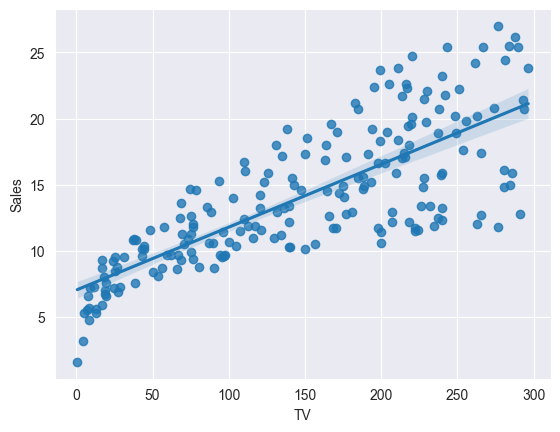

In [9]:
sns.regplot(x = X, y= y)

In [22]:
X, y = df.drop("Sales", axis = "columns"), df["Sales"]
X.insert(0, "Intercept", 1)

regression_fit = lambda X, y: np.linalg.pinv(X.T @ X) @ X.T @ y
beta_hat = regression_fit(X, y)
print(beta_hat)

predict = lambda x, beta: np.dot(x, beta)

test_sample = [1, 230.1, 37.8, 60.3]

y_hat = predict(test_sample, beta_hat)

print(f"TV: $230.1k, Radio: $37.8 k, Newspaper: S69.2 k predicts {y_hat:.1f} thousand units")


0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64
TV: $230.1k, Radio: $37.8 k, Newspaper: S69.2 k predicts 20.5 thousand units


* X.insert(0, "Intercept", 1): Добавляется столбец "Intercept" в начало матрицы признаков X, содержащий единицы. Этот столбец представляет константный член (intercept) в линейной регрессии. Добавление столбца единиц - это просто практический подход к правильному использованию метода наименьших квадратов при программировании линейной регрессии.  
* np.linalg.pinv используется для вычисления псевдообратной матрицы. Псевдообратная матрица (или Матрица Мура-Пенроуза) — это обобщение понятия обратной матрицы для матриц, которые могут быть не квадратными или сингулярными (матрицы, у которых определитель равен нулю). Если матрица обратима (квадратная матрица с ненулевым определителем), то её псевдообратная совпадает с обратной матрицей.  
* Выражение (X.T @ X) @ X.T @ y представляет собой формулу для вычисления коэффициентов регрессии в линейной регрессии с использованием метода наименьших квадратов (МНК).

(**X** - матрица признаков, к которой добавлен столбец единиц (Intercept);  
**X.T** - транспонированная матрица признаков;  
**X.T @ X** - произведение транспонированной матрицы признаков на саму себя, также известное как матрица Грама (Gram matrix);  
**np.linalg.pinv(X.T @ X)** - псевдообратная матрица от матрицы Грама. Она используется для учета случаев, когда матрица признаков может быть не полного ранга или сингулярной.  
**@ X.T** - умножение полученной псевдообратной матрицы на транспонированную матрицу признаков;
**@ y** - умножение результата на вектор целевой переменной.)

* beta_hat = regression_fit(X, y): Вычисляются коэффициенты регрессии (beta_hat) для модели линейной регрессии.

In [20]:
help (np.dot)

Help on _ArrayFunctionDispatcher in module numpy:

dot(...)
    dot(a, b, out=None)
    
    Dot product of two arrays. Specifically,
    
    - If both `a` and `b` are 1-D arrays, it is inner product of vectors
      (without complex conjugation).
    
    - If both `a` and `b` are 2-D arrays, it is matrix multiplication,
      but using :func:`matmul` or ``a @ b`` is preferred.
    
    - If either `a` or `b` is 0-D (scalar), it is equivalent to
      :func:`multiply` and using ``numpy.multiply(a, b)`` or ``a * b`` is
      preferred.
    
    - If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
      the last axis of `a` and `b`.
    
    - If `a` is an N-D array and `b` is an M-D array (where ``M>=2``), it is a
      sum product over the last axis of `a` and the second-to-last axis of
      `b`::
    
        dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
    
    It uses an optimized BLAS library when possible (see `numpy.linalg`).
    
    Parameters
    -----

In [24]:
train_fraction = int(len(df)*0.7)

train = df.sample(n=train_fraction, random_state = 42, replace = False)
print (train)
test = df.drop(train.index)

X_train, y_train = (train.drop("Sales", axis = "columns")), train["Sales"]
X_test, y_test = test.drop("Sales", axis = "columns"), test["Sales"]
X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)

for dataset in ["X_train", "X_test", "y_train", "y_test"]:
    print(f"Shape of {dataset}: {eval(dataset).shape}")



        TV  Radio  Newspaper  Sales
96   163.3   31.6       52.9   16.9
16   195.4   47.7       52.9   22.4
31   292.9   28.3       43.2   21.4
159   11.7   36.9       45.2    7.3
129  220.3   49.0        3.2   24.7
..     ...    ...        ...    ...
139   43.0   25.9       20.5    9.6
4    151.5   41.3       58.5   18.5
106  137.9   46.4       59.0   19.2
54   182.6   46.2       58.7   21.2
134  219.8   33.5       45.1   19.6

[140 rows x 4 columns]
Shape of X_train: (140, 4)
Shape of X_test: (60, 4)
Shape of y_train: (140,)
Shape of y_test: (60,)


In [12]:
beta_hat = regression_fit(X_train, y_train)
print(f"Regression coefficients beta: {beta_hat.values}")

predict = lambda X, weights: X @ weights

y_hat = predict(X_test.to_numpy(), np.reshape(beta_hat.to_numpy(), (4,1)))


Regression coefficients beta: [ 2.95609427  0.04679253  0.18706314 -0.00480492]


In [13]:
m = len(y_test)

y_hat = np.reshape(y_hat, (m))

MAE = np.divide(1, m) * np.sum(np.abs(y_test - y_hat))
MSE = np.divide(1, m) *np.sum(np.square(y_test - y_hat))
RMSE = np.sqrt(MSE)

for metric in [
    ("Mean absolute error", "MAE", "k units"),
    ("Mean squared error", "MSE", "M_units"),
    ("Root mean square error", "RMSE", "k_units"),
]:
    print(f"{metric[0]}: {eval(metric[1]):.2f}{metric[2]}")

Mean absolute error: 1.32k units
Mean squared error: 3.54M_units
Root mean square error: 1.88k_units
